# Chronic Kidney Disease Data Set

https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease

## Dataset Info

This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period. The dataset is multivariate, 400 instances, 24 features, 1 class (not chronic kidney disease / chronic kidney diesease), date donated 2015-07-03 and has missing values. 11 numeric , 14 nominal features. 250 CKD, 150 notckd (slight class imbalance). Missing attribute values denoted by "?" (there 1012 missing values out of a possible 9600 missing values, 10.5% of the dataset is missing, 242 of the 400 instance have at least one missing value, hence discarding rows with missing data would invovle discarding over half the dataset).

Dataset credit:
Source: Dr.P.Soundarapandian.M.D.,D.M (Senior Consultant Nephrologist)
Creator: L.Jerlin Rubini (Research Scholar)
Guided by: Dr.P.Eswaran (Computer Science Assistant Professor)

Below additional notes for the fields are derived from information on wikipedia.

# Dataset feature information

#### age - age

(numerical) Age in years.

Seniors over the age of about 60 are more likely than not to develop kidney disease.


### bp - blood pressure

(numerical) Blood Pressure in mm/Hg.

High blood pressure can cause kidney disease. Also Kidney disease causes high blood pressure. Blood pressure is increased due to fluid overload and production of vasoactive hormones created by the kidney via the renin–angiotensin system, increasing one's risk of developing hypertension and/or suffering from congestive heart failure.

### sg - specific gravity

_(nominal)_ either (1.005,1.010,1.015,1.020,1.025)

does it effect kidney disease?

### al - albumin

_(nominal)_ either (0,1,2,3,4,5)

does it effect kidney disease?

### su - sugar

_(nominal)_ either (0,1,2,3,4,5)

does it effect kidney disease?

### rbc - red blood cells

_(nominal)_ either (normal,abnormal)

does it effect kidney disease?

### pc - pus cell

_(nominal)_ either (normal,abnormal)

does it effect kidney disease?

### pcc - pus cell clumps

_(nominal)_ Pus Cell Clumps either (present,notpresent)

does it effect kidney disease?

### ba - bacteria

_(nominal)_ Bacteria either (present,notpresent)

does it effect kidney disease?

### bgr - blood glucose random

(numerical) Blood Glucose Random in mgs/dl (milligrams per deciliter)

does it effect kidney disease?

### bu - blood urea

(numerical) Blood Urea in mgs/dl  (milligrams per deciliter)

High levels of urea in the blood are indicative of failing kidneys. This can be detected on the skin, as uremic frost appearing as white dust.

### sc - serum creatinine

(numerical) Serum Creatinine in mgs/dl

does it effect kidney disease?

### sod - sodium

(numerical) Sodium in mEq/L

does it effect kidney disease?

### pot - potassium

(numerical) Potassium pot in mEq/L  (milliequivalent per liter) valence of potassium is 1 (electron)? Hence mmol/L = mEq/L for potassium?

High potassium is caused by failing kidneys. (Beyond 5.5mmol/L is bad) (can be excerbated by a lack of insulin).

### hemo - hemoglobin

(numerical) Hemoglobin hemo in gms

does it effect kidney disease?

### pcv - packed cell volume

(numerical) Packed Cell Volume

does it effect kidney disease?

### wbcc - white blood cell count

(numerical) White Blood Cell Count in cells/cumm

does it effect kidney disease?

### rbcc - red blood cell count

(numerical) Red Blood Cell Count in millions/cmm

does it effect kidney disease?

### htn - hypertension

_(nominal)_ Hypertension either (yes,no)

High blood pressure associated with KD can cuase hypertension.

### dm - diabetes mellitus

_(nominal)_ Diabetes Mellitus either (yes,no)

Diabetes can cause kidney disease.

### cad - coronary artery disease

_(nominal)_ Coronary Artery Disease either (yes,no)


### appet - appetite

_(nominal)_ Appetite either (good,poor)

Loss of appetite is a symptom of kidney disease.

### pe - pedal edema

_(nominal)_ Pedal Edema either (yes,no)

### ane - anemia

_(nominal)_ Anemia either (yes,no)

Kidney disease can cause anemia. (erythropoietin synthesis is decreased causing anemia.)

### class - class

class either (ckd,notckd)
standing for (not chronic kidney disease / chronic kidney diesease)


## Challenges with this Dataset

Challenges with this dataset at glance: lots of nominal features, slight class imbalance, high dimmensionality, greatly varrying scales, possible outliers and missing values.


## Load libraries

In [1]:
import random

import numpy as np
import pandas as pd

from scipy import stats

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import neighbors

from sklearn import preprocessing
from sklearn import decomposition

from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class_colours = {'notckd':'green', 'ckd':'red'}

## Load Dataset

In [2]:
# Load data
print('Loading Kidney Data...')
kidneys = pd.read_csv('chronic_kidney_disease.csv')

# Show overview data
print("Rows and Cols: " + str(kidneys.shape))
display(kidneys.describe())

Loading Kidney Data...
Rows and Cols: (400, 25)


age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  381.000000  383.000000  313.000000  312.000000  348.000000  329.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.526437   38.884498   
std     50.503006    5.741126   10.408752    3.193904    2.912587    8.990105   
min      1.500000    0.400000    4.500000    2.500000    3.100000    9.000000   
25%     27.000000    0.900000  135.000000    3.800000   10.300000   32.000000   
50%     42.000000    1.300000  138.000000    4.400000   12.650000   40.000000   
75%     66.000000    2.800000  142.000000    4.900000   15.000000   45.000000   
max    391.000000   76.000000  163.000000   47.000000   17.800000   54.000000   

               wbcc        rbcc  
count    294.000000  269.000000  
mean    8406.122449    4.707435  
std     2944.474190    1.025323  
min     2200.000000    2.100000  
25%     6500.000000    3.900000  
50%     8000.000000    4.800000  
75%     9800.000000    5.400000  
max    26400.000000    8.000000

## Convert Nominal Data to Numerical
All of the nominal features are boolean, hence converting the numeric is okay.

In [3]:
# Converts nominal colums to numerical
nomfeats = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for nomfeat in nomfeats:
    print("Converting " + nomfeat + " to numerical")    
    for i in range(len(kidneys[nomfeat])):
        if ((kidneys[nomfeat][i] == "yes") or
            (kidneys[nomfeat][i] == "good") or
            (kidneys[nomfeat][i] == "notpresent") or
            (kidneys[nomfeat][i] == "normal")):
            kidneys.loc[i, nomfeat] = 1
        elif ((kidneys[nomfeat][i] == "no") or
                (kidneys[nomfeat][i] == "poor") or
                (kidneys[nomfeat][i] == "present") or
                (kidneys[nomfeat][i] == "abnormal")):
            kidneys.loc[i, nomfeat] = 0

# Class column too
print("## Converting class column ##")
for i in range(len(kidneys['class'])):
    if ((kidneys['class'][i] == "ckd")):
        kidneys.loc[i, 'class'] = 1
    elif ((kidneys['class'][i] == "notckd")):
        kidneys.loc[i, 'class'] = 0

Converting rbc to numerical
Converting pc to numerical
Converting pcc to numerical
Converting ba to numerical
Converting htn to numerical
Converting dm to numerical
Converting cad to numerical
Converting appet to numerical
Converting pe to numerical
Converting ane to numerical
## Converting class column ##


## Handle Missing Values (Most Freq + KNN)

In [4]:
print("Before")
display(kidneys)

# Handle the Nominal Features by inserting the most common value 
print("\n\nNominal Features:\n")
for nomfeat in nomfeats:    
    print(str(nomfeat) + " most frequent value " + str(kidneys[nomfeat].value_counts().idxmax()) + "\n")
    kidneys[nomfeat].fillna(kidneys[nomfeat].value_counts().idxmax(), inplace=True)


print("\n\nNumeric Features:\n")
print("Handled per row by KNN")
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed = imputer.fit_transform(kidneys)
kidneys=pd.DataFrame(imputed, columns=kidneys.columns)

print("\n\nAfter")
display(kidneys)

Before


age    bp     sg   al   su  rbc pc pcc ba    bgr  ...   pcv    wbcc  \
0    48.0  80.0  1.020  1.0  0.0  NaN  1   1  1  121.0  ...  44.0  7800.0   
1     7.0  50.0  1.020  4.0  0.0  NaN  1   1  1    NaN  ...  38.0  6000.0   
2    62.0  80.0  1.010  2.0  3.0    1  1   1  1  423.0  ...  31.0  7500.0   
3    48.0  70.0  1.005  4.0  0.0    1  0   0  1  117.0  ...  32.0  6700.0   
4    51.0  80.0  1.010  2.0  0.0    1  1   1  1  106.0  ...  35.0  7300.0   
..    ...   ...    ...  ...  ...  ... ..  .. ..    ...  ...   ...     ...   
395  55.0  80.0  1.020  0.0  0.0    1  1   1  1  140.0  ...  47.0  6700.0   
396  42.0  70.0  1.025  0.0  0.0    1  1   1  1   75.0  ...  54.0  7800.0   
397  12.0  80.0  1.020  0.0  0.0    1  1   1  1  100.0  ...  49.0  6600.0   
398  17.0  60.0  1.025  0.0  0.0    1  1   1  1  114.0  ...  51.0  7200.0   
399  58.0  80.0  1.025  0.0  0.0    1  1   1  1  131.0  ...  53.0  6800.0   

     rbcc  htn  dm  cad  appet  pe ane class  
0     5.2    1   1    0      1   0   0     1  
1     NaN    0   0    0      1   0   0     1  
2     NaN    0   1    0      0   0   1     1  
3     3.9    1   0    0      0   1   1     1  
4     4.6    0   0    0      1   0   0     1  
..    ...  ...  ..  ...    ...  ..  ..   ...  
395   4.9    0   0    0      1   0   0     0  
396   6.2    0   0    0      1   0   0     0  
397   5.4    0   0    0      1   0   0     0  
398   5.9    0   0    0      1   0   0     0  
399   6.1    0   0    0      1   0   0     0  

[400 rows x 25 columns]



Nominal Features:

rbc most frequent value 1

pc most frequent value 1

pcc most frequent value 1

ba most frequent value 1

htn most frequent value 0

dm most frequent value 0

cad most frequent value 0

appet most frequent value 1

pe most frequent value 0

ane most frequent value 0



Numeric Features:

Handled per row by KNN


After


age    bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...   pcv  \
0    48.0  80.0  1.020  1.0  0.0  1.0  1.0  1.0  1.0  121.0  ...  44.0   
1     7.0  50.0  1.020  4.0  0.0  1.0  1.0  1.0  1.0  113.0  ...  38.0   
2    62.0  80.0  1.010  2.0  3.0  1.0  1.0  1.0  1.0  423.0  ...  31.0   
3    48.0  70.0  1.005  4.0  0.0  1.0  0.0  0.0  1.0  117.0  ...  32.0   
4    51.0  80.0  1.010  2.0  0.0  1.0  1.0  1.0  1.0  106.0  ...  35.0   
..    ...   ...    ...  ...  ...  ...  ...  ...  ...    ...  ...   ...   
395  55.0  80.0  1.020  0.0  0.0  1.0  1.0  1.0  1.0  140.0  ...  47.0   
396  42.0  70.0  1.025  0.0  0.0  1.0  1.0  1.0  1.0   75.0  ...  54.0   
397  12.0  80.0  1.020  0.0  0.0  1.0  1.0  1.0  1.0  100.0  ...  49.0   
398  17.0  60.0  1.025  0.0  0.0  1.0  1.0  1.0  1.0  114.0  ...  51.0   
399  58.0  80.0  1.025  0.0  0.0  1.0  1.0  1.0  1.0  131.0  ...  53.0   

       wbcc  rbcc  htn   dm  cad  appet   pe  ane  class  
0    7800.0  5.20  1.0  1.0  0.0    1.0  0.0  0.0    1.0  
1    6000.0  4.96  0.0  0.0  0.0    1.0  0.0  0.0    1.0  
2    7500.0  3.80  0.0  1.0  0.0    0.0  0.0  1.0    1.0  
3    6700.0  3.90  1.0  0.0  0.0    0.0  1.0  1.0    1.0  
4    7300.0  4.60  0.0  0.0  0.0    1.0  0.0  0.0    1.0  
..      ...   ...  ...  ...  ...    ...  ...  ...    ...  
395  6700.0  4.90  0.0  0.0  0.0    1.0  0.0  0.0    0.0  
396  7800.0  6.20  0.0  0.0  0.0    1.0  0.0  0.0    0.0  
397  6600.0  5.40  0.0  0.0  0.0    1.0  0.0  0.0    0.0  
398  7200.0  5.90  0.0  0.0  0.0    1.0  0.0  0.0    0.0  
399  6800.0  6.10  0.0  0.0  0.0    1.0  0.0  0.0    0.0  

[400 rows x 25 columns]

## Visualise the Data 

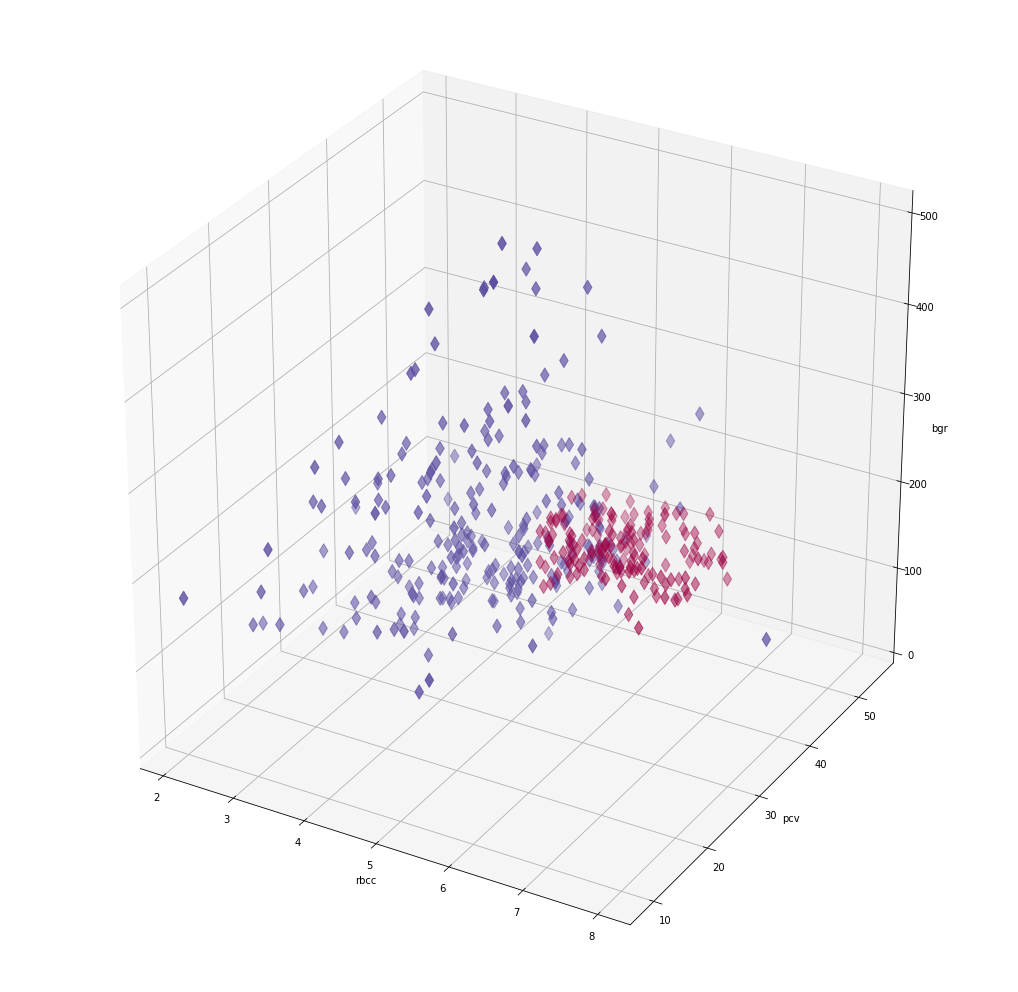

In [5]:
fig = plt.figure(figsize=(18, 18))
ax1 = fig.add_subplot(1,1,1, projection='3d')
ax1.scatter(kidneys['rbcc'], kidneys['pcv'], kidneys['bgr'], c=kidneys['class'], cmap='Spectral', marker='d', s=100)
ax1.set_xlabel('rbcc')
ax1.set_ylabel('pcv')
ax1.set_zlabel('bgr')
plt.show()

## Look for Correlations between features and Kidney Disease

In [6]:
kidneys.corr()["class"]

age      0.212790
bp       0.276030
sg      -0.711396
al       0.607703
su       0.335882
rbc     -0.282642
pc      -0.375154
pcc     -0.265313
ba      -0.186871
bgr      0.415379
bu       0.372431
sc       0.294849
sod     -0.338013
pot      0.066282
hemo    -0.711739
pcv     -0.673698
wbcc     0.227205
rbcc    -0.571800
htn      0.590438
dm       0.559060
cad      0.236088
appet   -0.393341
pe       0.375154
ane      0.325396
class    1.000000
Name: class, dtype: float64

## Visualising the most strongly correlatted features

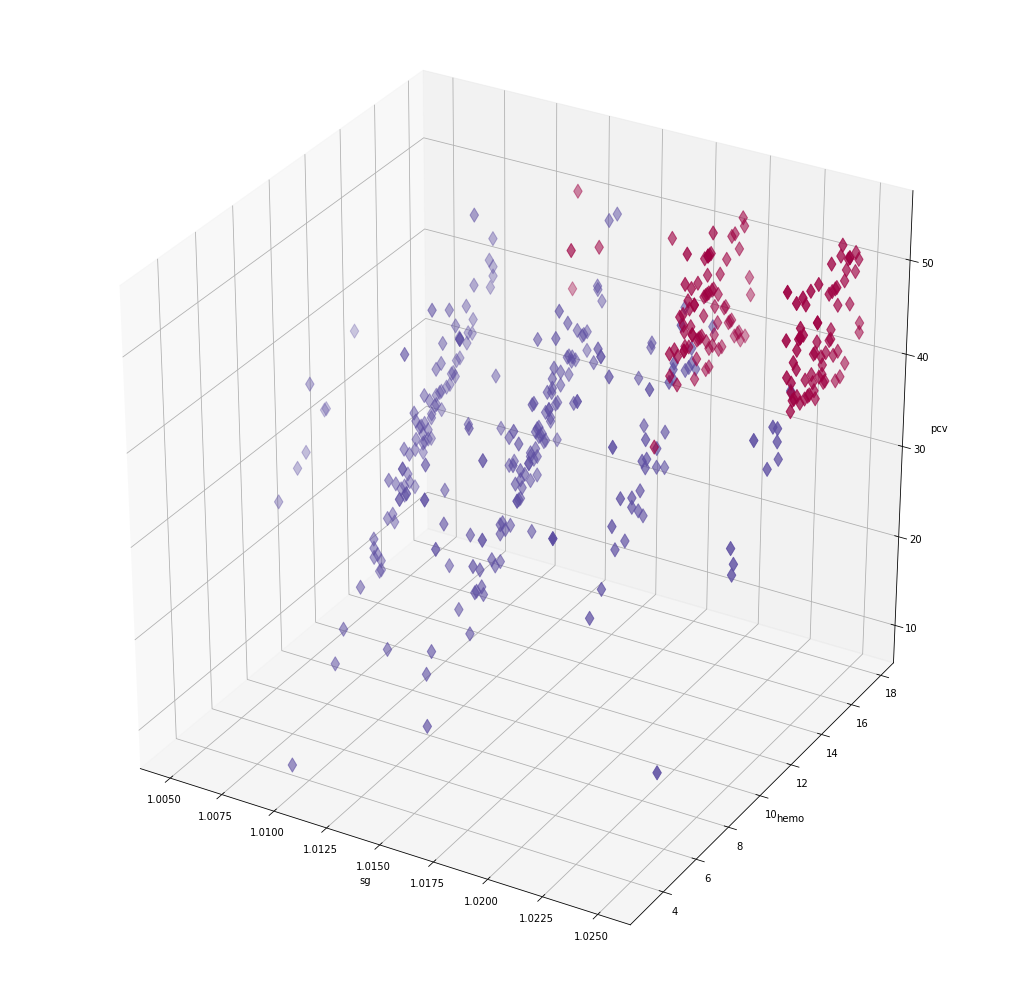

In [7]:
fig = plt.figure(figsize=(18, 18))
ax1 = fig.add_subplot(1,1,1, projection='3d')
ax1.scatter(kidneys['sg'], kidneys['hemo'], kidneys['pcv'], c=kidneys['class'], cmap='Spectral', marker='d', s=100)
ax1.set_xlabel('sg')
ax1.set_ylabel('hemo')
ax1.set_zlabel('pcv')
plt.show()

## Normalise

In [8]:
# Normalise the datasets
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(kidneys)
kidneys = pd.DataFrame(np_scaled, columns=kidneys.columns)
print(kidneys.head())

        age        bp    sg   al   su  rbc   pc  pcc   ba       bgr  ...  \
0  0.522727  0.230769  0.75  0.2  0.0  1.0  1.0  1.0  1.0  0.211538  ...   
1  0.056818  0.000000  0.75  0.8  0.0  1.0  1.0  1.0  1.0  0.194444  ...   
2  0.681818  0.230769  0.25  0.4  0.6  1.0  1.0  1.0  1.0  0.856838  ...   
3  0.522727  0.153846  0.00  0.8  0.0  1.0  0.0  0.0  1.0  0.202991  ...   
4  0.556818  0.230769  0.25  0.4  0.0  1.0  1.0  1.0  1.0  0.179487  ...   

        pcv      wbcc      rbcc  htn   dm  cad  appet   pe  ane  class  
0  0.777778  0.231405  0.525424  1.0  1.0  0.0    1.0  0.0  0.0    1.0  
1  0.644444  0.157025  0.484746  0.0  0.0  0.0    1.0  0.0  0.0    1.0  
2  0.488889  0.219008  0.288136  0.0  1.0  0.0    0.0  0.0  1.0    1.0  
3  0.511111  0.185950  0.305085  1.0  0.0  0.0    0.0  1.0  1.0    1.0  
4  0.577778  0.210744  0.423729  0.0  0.0  0.0    1.0  0.0  0.0    1.0  

[5 rows x 25 columns]


## Assess the Size of the Class Inbalance

In [9]:
# Access class imbalance
ckd_count = len(kidneys[kidneys['class'] == 1 ])
not_ckd_count = len(kidneys[kidneys['class'] == 0 ])


print("Not Chronic Kidney Disease: "  + str(not_ckd_count) + "  (" +  str((not_ckd_count / (ckd_count + not_ckd_count)) * 100) + "%)") 
print("Chronic Kidney Disease: "  + str(ckd_count) + "  (" + str((ckd_count / (ckd_count + not_ckd_count)) * 100) + "%)") 


Not Chronic Kidney Disease: 150  (37.5%)
Chronic Kidney Disease: 250  (62.5%)


## Upsample the Minority Class (Not Chronic Kidney Disease)
Uses a bootstrapping procedure

In [10]:
df_majority = kidneys[kidneys['class'] == 1 ]
df_minority = kidneys[kidneys['class'] == 0 ]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
     replace=True,
     n_samples=250,    # to match majority class
     random_state=1)
 
# Combine majority class with upsampled minority class
kidneys = pd.concat([df_majority, df_minority_upsampled])

## Assess the Size of the Classes (Again)

In [11]:
# Access class imbalance
ckd_count = len(kidneys[kidneys['class'] == 1 ])
not_ckd_count = len(kidneys[kidneys['class'] == 0 ])


print("Not Chronic Kidney Disease: "  + str(not_ckd_count) + "  (" +  str((not_ckd_count / (ckd_count + not_ckd_count)) * 100) + "%)") 
print("Chronic Kidney Disease: "  + str(ckd_count) + "  (" + str((ckd_count / (ckd_count + not_ckd_count)) * 100) + "%)") 


Not Chronic Kidney Disease: 250  (50.0%)
Chronic Kidney Disease: 250  (50.0%)


## Split from labels

In [12]:
X = kidneys.drop('class', axis=1)
y = kidneys['class']

## Remove Outliers

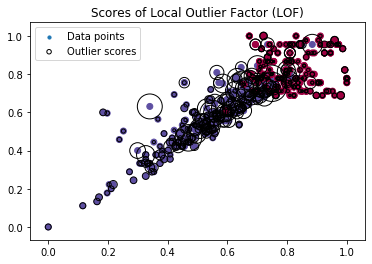

Instance count before LOF: 500


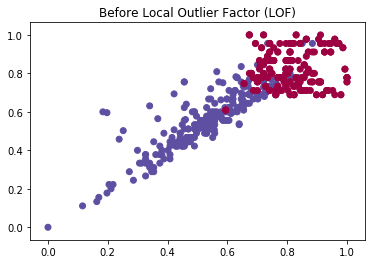

Instance count after LOF: 475


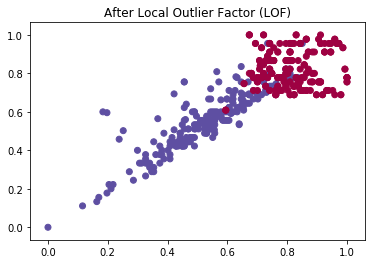

In [13]:
# Remove the outliers using the LOF Algorithm
clf = neighbors.LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Prediction of which instances are outliers
y_pred = clf.fit_predict(X)

# Scores for how outlying each instance is
x_scores = clf.negative_outlier_factor_

plt.title("Scores of Local Outlier Factor (LOF)")
plt.scatter(X["hemo"], X["pcv"], label='Data points', c=y, cmap='Spectral')

# plot circles with radius proportional to the outlier scores
radius = (x_scores.max() - x_scores) / (x_scores.max() - x_scores.min())
plt.scatter(X["hemo"], X["pcv"], s=1000 * radius, edgecolors='k', facecolors='none', label='Outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

print('Instance count before LOF: ' + str(len(X)))

plt.title("Before Local Outlier Factor (LOF)")
plt.scatter(X["hemo"], X["pcv"], label='Data points', c=y, cmap='Spectral')
plt.show()

# Actually remove outlying instances
X = X[y_pred != -1]
y = y[y_pred != -1]

print('Instance count after LOF: ' + str(len(X)))
        
plt.title("After Local Outlier Factor (LOF)")
plt.scatter(X["hemo"], X["pcv"], label='Data points', c=y, cmap='Spectral')
plt.show()

## Principle Component Analysis - Scree Plot

[0.42019251 0.10408658 0.07224727 0.06443197 0.05055109 0.04732088
 0.03994233 0.03321947 0.03152202 0.02151745 0.02028642 0.01897243
 0.01802993 0.01192811 0.01147734 0.00632198 0.00577768 0.0054417
 0.00493092 0.00430343 0.00335827 0.00229416 0.00117929 0.0006668 ]


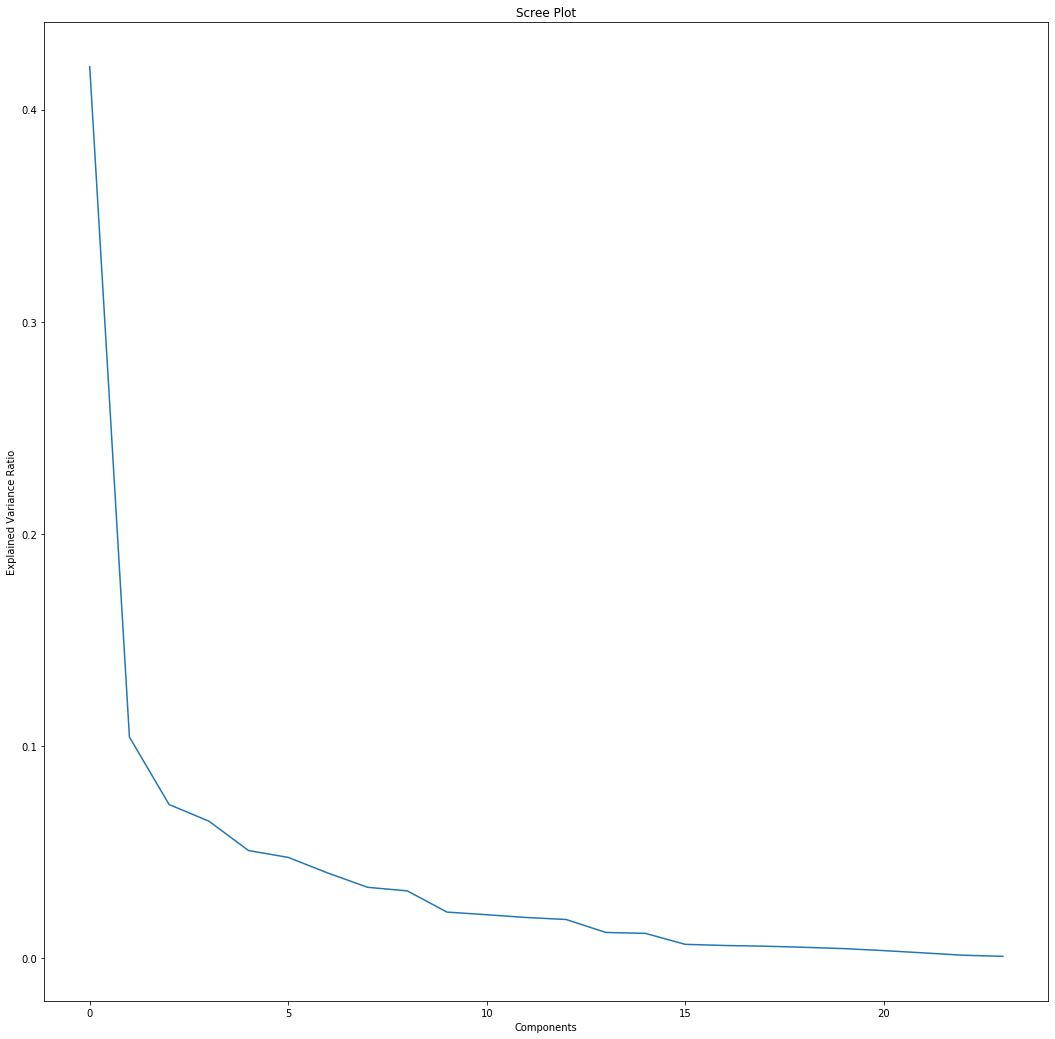

In [14]:
# Number of principle components, dimmensions to reduce to
pca = decomposition.PCA(n_components=24)

# Find the principle components, using the covarience matrix, eigen vectors 
pca_model = pca.fit(X)

# Percentage of variance explained for each components
print(pca.explained_variance_ratio_)

# Plot the scree plot
fig = plt.figure(figsize=(18, 18))
plt.plot(pca.explained_variance_ratio_)
plt.title("Scree Plot")
plt.xlabel("Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

## Principle Component Analysis - Transform

In [15]:
n_dims = 12

# Number of principle components, dimmensions to reduce to
pca = decomposition.PCA(n_components=n_dims)

# Find the principle components, using the covarience matrix, eigen vectors 
pca_model = pca.fit(X)

# Transform the data
pca_array = pca_model.transform(X)

# define column names
col_names = []
for i in range(n_dims):
    col_names.append("PC" + str(i))

## Data frames are easier to work with than arrays
X = pd.DataFrame(data=pca_array, columns=col_names)

In [16]:
display(X)

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0    0.382556 -0.787057 -0.203104  0.036053 -0.093498  0.088628  0.007883   
1    0.846733 -0.256122  0.359712  0.218333  0.704344 -1.040029 -0.100946   
2    1.572628  1.152011  0.556221  0.427745  0.418671  0.429730 -0.388076   
3   -0.297623  0.101748 -0.075947  0.077599 -0.055741 -0.092910 -0.081321   
4    0.888484 -0.534383  0.191139 -0.306157 -0.535539  0.282229 -0.504591   
..        ...       ...       ...       ...       ...       ...       ...   
470 -0.620458  0.019343  0.012924 -0.018811  0.013318  0.018076 -0.000306   
471 -0.606881 -0.008520  0.026723 -0.010745  0.040887  0.082866  0.055084   
472 -0.675010  0.011627  0.045071 -0.040044  0.031313  0.079275  0.025148   
473 -0.590119  0.009979  0.034499  0.015528  0.020712  0.057224  0.047121   
474 -0.641576  0.046969  0.058378  0.008596 -0.002563  0.022897  0.013085   

          PC7       PC8       PC9      PC10      PC11  
0   -0.351922  0.235757  0.031660  0.156373 -0.263061  
1    0.438412 -0.104136  0.219583 -0.126835  0.478779  
2   -0.235297 -0.277615 -0.254170 -0.150028  0.070642  
3    0.020015 -0.560140 -0.025596 -0.093574  0.035066  
4   -0.200119 -0.026990 -0.186595  0.218779 -0.163043  
..        ...       ...       ...       ...       ...  
470 -0.004103 -0.001533 -0.023775 -0.017096  0.035886  
471  0.024515  0.191249 -0.107388  0.071597  0.163926  
472 -0.000016  0.195419 -0.043668  0.080909  0.040755  
473  0.039538  0.157686 -0.061164  0.046963  0.070396  
474  0.022349  0.119922  0.066460  0.032792 -0.141099  

[475 rows x 12 columns]

## Visualise PCA transfromed Data

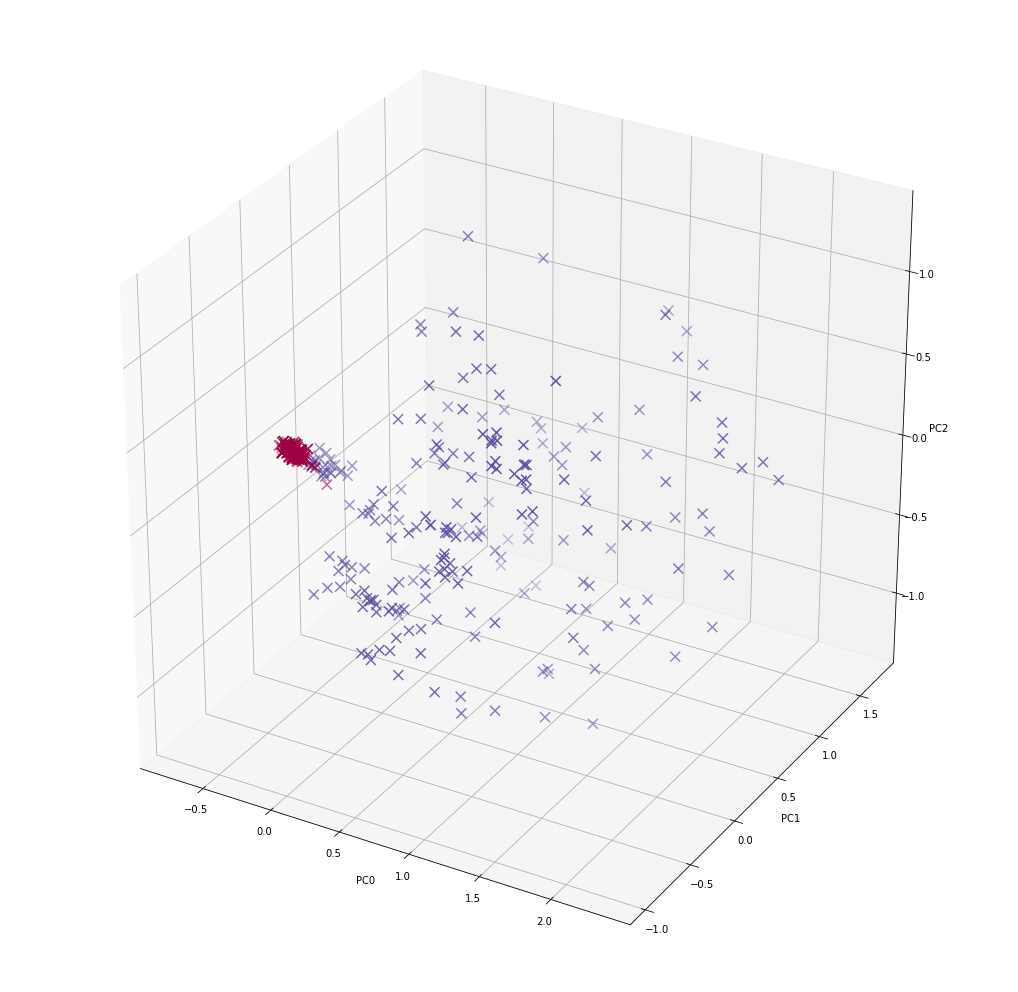

In [17]:
fig = plt.figure(figsize=(18, 18))
ax1 = fig.add_subplot(1,1,1, projection='3d')
ax1.scatter(X['PC0'], X['PC1'], X['PC2'], c=y, cmap='Spectral', marker='x', s=100)
ax1.set_xlabel('PC0')
ax1.set_ylabel('PC1')
ax1.set_zlabel('PC2')
plt.show()

## Learn and Predict Classes

Sklearn offers a range of classifiers, here is theie graphic comparing them.

Looking at the plotted data, particularly the 2d plots the data is looks like a ball with slice into it, i.e. concave. Therfore, I wiht the kidney to is most similar to the half moons dataset.

![comparison of methods](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)


There I will try training:


* Nearest Neighbors (KNN)
* Neural net (MLP)
* Gaussain Process
* RBF SVM
* Decision Tree






In [18]:
names = ["Nearest Neighbors k3",
         "Nearest Neighbors k6",
         "Nearest Neighbors k9",
         "Nearest Neighbors k12",
         "Nearest Neighbors k15",
         "Nearest Neighbors k18",
         "Nearest Neighbors k21",
         "RBF SVM C0001",
         "RBF SVM C001",
         "RBF SVM C01",
         "RBF SVM C1",
         "RBF SVM 1C",
         "RBF SVM C10",
         "RBF SVM C100",
         "RBF SVM C1000",
         "Gaussian Process RBF Isotropic",
         "Gaussian Process RBF Anisotropic",
         "Decision Tree 3",
         "Decision Tree 6",
         "Decision Tree 9",
         "Decision Tree 12",
         "Decision Tree 15",
         "Random Forest 6-9",
         "Random Forest 6-12",
         "Random Forest 6-15",
         "Random Forest 9-9",
         "Random Forest 9-12",
         "Random Forest 9-15",
         "Random Forest 12-9",
         "Random Forest 12-12",
         "Random Forest 12-15",
         "Neural Net 1a",
         "Neural Net a1",
         "Neural Net a01",
         "Neural Net a001",
         "Neural Net a0001",
         "Neural Net 800",
         "Neural Net lr0001",
         "Neural Net small",
         "Neural Net tiny",
         "Neural Net tinyfast",
         "Neural Net tinysuperfast",
         "Neural Net nanosuperfast"
        ]

classifiers = [
    KNeighborsClassifier(3), #"Nearest Neighbors k3"
    KNeighborsClassifier(6), #"Nearest Neighbors k6"
    KNeighborsClassifier(9), #"Nearest Neighbors k9"
    KNeighborsClassifier(12), #"Nearest Neighbors k12"
    KNeighborsClassifier(15), #"Nearest Neighbors k15"
    KNeighborsClassifier(18), #"Nearest Neighbors k18"
    KNeighborsClassifier(21), #"Nearest Neighbors k21"
    SVC(gamma=2, C=.0001), #"RBF SVM C0001"
    SVC(gamma=2, C=.001), #"RBF SVM C001"
    SVC(gamma=2, C=.01), #"RBF SVM C01"
    SVC(gamma=2, C=.1), #"RBF SVM C1"
    SVC(gamma=2, C=1), #"RBF SVM 1C"
    SVC(gamma=2, C=10), #"RBF SVM C10"
    SVC(gamma=2, C=100), #"RBF SVM C100"
    SVC(gamma=2, C=1000), #"RBF SVM C1000"
    GaussianProcessClassifier(1.0 * RBF([1.0])), #"Gaussian Process RBF Isotropic"
    GaussianProcessClassifier(1.0 * RBF([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), max_iter_predict =200), #"Gaussian Process RBF Anisotropic"
    DecisionTreeClassifier(max_depth=3), #"Decision Tree 3"
    DecisionTreeClassifier(max_depth=6), #"Decision Tree 6"
    DecisionTreeClassifier(max_depth=9), #"Decision Tree 9"
    DecisionTreeClassifier(max_depth=12), #"Decision Tree 12"
    DecisionTreeClassifier(max_depth=15), #"Decision Tree 15"
    RandomForestClassifier(max_depth=6, n_estimators=9, max_features=1), #"Random Forest 6-9"
    RandomForestClassifier(max_depth=6, n_estimators=12, max_features=1), #"Random Forest 6-12"
    RandomForestClassifier(max_depth=6, n_estimators=15, max_features=1), #"Random Forest 6-15"
    RandomForestClassifier(max_depth=9, n_estimators=9, max_features=1), #"Random Forest 9-9"
    RandomForestClassifier(max_depth=9, n_estimators=12, max_features=1), #"Random Forest 9-12"
    RandomForestClassifier(max_depth=9, n_estimators=15, max_features=1), #"Random Forest 9-15"
    RandomForestClassifier(max_depth=12, n_estimators=9, max_features=1), #"Random Forest 12-9"
    RandomForestClassifier(max_depth=12, n_estimators=12, max_features=1), #"Random Forest 12-12"
    RandomForestClassifier(max_depth=12, n_estimators=15, max_features=1), #"Random Forest 12-15"
    MLPClassifier(solver='adam', max_iter=400, alpha=1,  activation='relu' , hidden_layer_sizes=(400,), learning_rate_init=.001), #"Neural Net 1a"
    MLPClassifier(solver='adam', max_iter=400, alpha=.1,  activation='relu' , hidden_layer_sizes=(400,), learning_rate_init=.001),#"Neural Net a1"
    MLPClassifier(solver='adam', max_iter=400, alpha=.01,  activation='relu' , hidden_layer_sizes=(400,), learning_rate_init=.001), #"Neural Net a01"
    MLPClassifier(solver='adam', max_iter=400, alpha=.001,  activation='relu' , hidden_layer_sizes=(400,), learning_rate_init=.001), #"Neural Net a001"
    MLPClassifier(solver='adam', max_iter=400, alpha=.0001,  activation='relu' , hidden_layer_sizes=(400,), learning_rate_init=.001),#"Neural Net a0001"
    MLPClassifier(solver='adam', max_iter=400, alpha=.1,  activation='relu' , hidden_layer_sizes=(800,), learning_rate_init=.001),#"Neural Net 800"
    MLPClassifier(solver='adam', max_iter=400, alpha=.1,  activation='relu' , hidden_layer_sizes=(400,), learning_rate_init=.0001),#"Neural Net lr0001"
    MLPClassifier(solver='adam', max_iter=400, alpha=.1,  activation='relu' , hidden_layer_sizes=(200,), learning_rate_init=.001),#"Neural Net small"
    MLPClassifier(solver='adam', max_iter=400, alpha=.1,  activation='relu' , hidden_layer_sizes=(50,), learning_rate_init=.001),#"Neural Net tiny"
    MLPClassifier(solver='adam', max_iter=50, alpha=.1,  activation='relu' , hidden_layer_sizes=(50,), learning_rate_init=.001),#"Neural Net tinyfast"
    MLPClassifier(solver='adam', max_iter=50, alpha=.1,  activation='relu' , hidden_layer_sizes=(50,), learning_rate_init=.01),#"Neural Net tinysuperfast"
    MLPClassifier(solver='adam', max_iter=50, alpha=.1,  activation='relu' , hidden_layer_sizes=(30,), learning_rate_init=.01),#"Neural Net nanosuperfast"
]

print("Names: " + str(len(names)))
print("Classifiers: " + str(len(classifiers)))

for i in range(1):  #formerly 300
    print("Run" + str(i))
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)    
        print(name + "," + str(score))
    print("#########################")

Names: 43
Classifiers: 43
Run0
Nearest Neighbors k3,0.9663865546218487
Nearest Neighbors k6,0.9663865546218487
Nearest Neighbors k9,0.9663865546218487
Nearest Neighbors k12,0.9663865546218487
Nearest Neighbors k15,0.957983193277311
Nearest Neighbors k18,0.9411764705882353
Nearest Neighbors k21,0.9327731092436975
RBF SVM C0001,0.4957983193277311
RBF SVM C001,0.4957983193277311
RBF SVM C01,0.9327731092436975
RBF SVM C1,0.9495798319327731
RBF SVM 1C,0.9747899159663865
RBF SVM C10,0.9663865546218487
RBF SVM C100,0.9831932773109243
RBF SVM C1000,0.9831932773109243
Gaussian Process RBF Isotropic,0.9495798319327731
Gaussian Process RBF Anisotropic,0.9747899159663865
Decision Tree 3,0.9915966386554622
Decision Tree 6,1.0
Decision Tree 9,1.0
Decision Tree 12,1.0
Decision Tree 15,1.0
Random Forest 6-9,0.9915966386554622
Random Forest 6-12,1.0
Random Forest 6-15,0.9831932773109243
Random Forest 9-9,0.9915966386554622
Random Forest 9-12,1.0
Random Forest 9-15,0.9915966386554622
Random Forest 12-9,

/home/paul/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Net lr0001,0.9411764705882353
Neural Net small,0.9663865546218487
Neural Net tiny,0.9663865546218487
Neural Net tinyfast,0.8823529411764706
Neural Net tinysuperfast,0.9663865546218487
Neural Net nanosuperfast,0.9663865546218487
#########################


/home/paul/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/paul/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/paul/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Averages for Algorithms Sorted by Score

In [19]:
# Read dataset
df = pd.read_csv('results.csv')

# calculate means
df = df.groupby(['algorithm'], as_index=False)['score'].mean()
df.sort_values(['score'], axis=0, ascending=False, inplace=True, ignore_index=False)

display(df)

algorithm     score
35               Random Forest 12-15  0.995322
41                Random Forest 9-15  0.995042
34               Random Forest 12-12  0.994286
42                 Random Forest 9-9  0.994090
37                Random Forest 6-12  0.993978
36                Random Forest 12-9  0.993978
38                Random Forest 6-15  0.993810
40                Random Forest 9-12  0.993782
39                 Random Forest 6-9  0.993277
2                    Decision Tree 3  0.990196
33                     RBF SVM C1000  0.989580
3                    Decision Tree 6  0.989188
4                    Decision Tree 9  0.989048
1                   Decision Tree 15  0.988739
32                      RBF SVM C100  0.988711
0                   Decision Tree 12  0.988375
5   Gaussian Process RBF Anisotropic  0.987619
31                       RBF SVM C10  0.985350
6     Gaussian Process RBF Isotropic  0.984678
26                        RBF SVM 1C  0.983501
11              Nearest Neighbors k3  0.982913
15                    Neural Net 800  0.982045
16                  Neural Net a0001  0.980980
17                   Neural Net a001  0.980812
19                     Neural Net a1  0.980784
18                    Neural Net a01  0.980252
14                     Neural Net 1a  0.980000
25          Neural Net tinysuperfast  0.979916
7              Nearest Neighbors k12  0.979832
22                  Neural Net small  0.979804
13              Nearest Neighbors k9  0.979776
12              Nearest Neighbors k6  0.979692
8              Nearest Neighbors k15  0.979524
21          Neural Net nanosuperfast  0.979412
23                   Neural Net tiny  0.978992
9              Nearest Neighbors k18  0.976695
30                        RBF SVM C1  0.975854
10             Nearest Neighbors k21  0.974734
20                 Neural Net lr0001  0.968095
29                       RBF SVM C01  0.952381
24               Neural Net tinyfast  0.944202
28                      RBF SVM C001  0.524958
27                     RBF SVM C0001  0.524958

## P-Values for each Dataset, Comparing each Algorithm

In [20]:
# We can use this test, if we observe two independent samples from the same or
# different population, e.g. exam scores of boys and girls or of two ethnic groups.
# The test measures whether the average (expected) value differs significantly across
# samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then
# we cannot reject the null hypothesis of identical average scores. If the p-value
# is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null 
# hypothesis of equal averages.

# So we can see that it is statistically significant if less than 0.05 i.e. 5%

# Read dataset
df = pd.read_csv('results.csv')

algorithms = df['algorithm'].unique()

# to accumulate th p values for this one dataset
p_values = []
for algorithm1 in algorithms:
    for algorithm2 in algorithms:
        df_temp_1 = df[df.algorithm == algorithm1]
        df_temp_2 = df[df.algorithm == algorithm2]
        # Two sample t test, better than the above section, for testing if two distribution are different
        p_values.append([ algorithm1, algorithm2, stats.ttest_ind(df_temp_1['score'], df_temp_2['score']).pvalue])

# Switch to dataframe to make it easier to read
pvalue_df = pd.DataFrame(p_values, columns = ['Algorithm1', 'Algorithm2', "p-value"])

# Make table more compact and easier to read by making algirthm by algorithm
pvalue_df = pvalue_df.pivot(index="Algorithm2", columns='Algorithm1', values='p-value')

display(pvalue_df)  


Algorithm1                        Decision Tree 12  Decision Tree 15  \
Algorithm2                                                             
Decision Tree 12                      1.000000e+00      6.654950e-01   
Decision Tree 15                      6.654950e-01      1.000000e+00   
Decision Tree 3                       3.592659e-02      7.839764e-02   
Decision Tree 6                       3.408056e-01      5.809982e-01   
Decision Tree 9                       4.264182e-01      7.016125e-01   
Gaussian Process RBF Anisotropic      3.599712e-01      1.533130e-01   
Gaussian Process RBF Isotropic        4.528347e-05      3.023753e-06   
Nearest Neighbors k12                 7.639556e-19      1.063244e-21   
Nearest Neighbors k15                 5.353632e-19      9.902763e-22   
Nearest Neighbors k18                 1.480637e-27      9.877689e-31   
Nearest Neighbors k21                 6.035200e-31      6.432041e-34   
Nearest Neighbors k3                  4.573713e-09      8.182463e-11   
Nearest Neighbors k6                  2.287069e-18      4.906521e-21   
Nearest Neighbors k9                  7.969468e-20      6.756330e-23   
Neural Net 1a                         2.708897e-16      1.267542e-18   
Neural Net 800                        1.417695e-11      1.184067e-13   
Neural Net a0001                      4.638101e-14      2.700223e-16   
Neural Net a001                       1.268020e-14      6.371177e-17   
Neural Net a01                        1.473393e-16      4.551284e-19   
Neural Net a1                         1.825295e-15      5.723394e-18   
Neural Net lr0001                     2.688039e-60      8.543517e-65   
Neural Net nanosuperfast              1.275367e-20      1.109546e-23   
Neural Net small                      1.339126e-18      2.214946e-21   
Neural Net tiny                       5.922955e-21      7.207828e-24   
Neural Net tinyfast                   8.131864e-91      3.256205e-93   
Neural Net tinysuperfast              8.458108e-19      1.085132e-21   
RBF SVM 1C                            3.132302e-08      5.268604e-10   
RBF SVM C0001                         0.000000e+00      0.000000e+00   
RBF SVM C001                          0.000000e+00      0.000000e+00   
RBF SVM C01                          1.609660e-113     2.525050e-118   
RBF SVM C1                            1.648278e-34      1.370805e-38   
RBF SVM C10                           3.745258e-04      2.922720e-05   
RBF SVM C100                          6.755648e-01      9.705967e-01   
RBF SVM C1000                         1.408789e-01      2.783836e-01   
Random Forest 12-12                   6.504196e-14      7.736053e-14   
Random Forest 12-15                   1.529333e-19      6.241021e-20   
Random Forest 12-9                    2.390368e-12      3.657698e-12   
Random Forest 6-12                    5.209343e-12      8.626913e-12   
Random Forest 6-15                    1.376613e-11      2.341425e-11   
Random Forest 6-9                     1.848865e-09      4.014778e-09   
Random Forest 9-12                    1.285935e-11      2.147642e-11   
Random Forest 9-15                    6.456794e-17      5.123450e-17   
Random Forest 9-9                     8.972684e-13      1.302730e-12   

Algorithm1                        Decision Tree 3  Decision Tree 6  \
Algorithm2                                                           
Decision Tree 12                     3.592659e-02     3.408056e-01   
Decision Tree 15                     7.839764e-02     5.809982e-01   
Decision Tree 3                      1.000000e+00     2.285341e-01   
Decision Tree 6                      2.285341e-01     1.000000e+00   
Decision Tree 9                      1.664849e-01     8.635365e-01   
Gaussian Process RBF Anisotropic     1.531477e-03     4.884540e-02   
Gaussian Process RBF Isotropic       8.594692e-10     3.129209e-07   
Nearest Neighbors k12                6.031057e-27     3.536743e-23   
Nearest Neighbors k15                7.698743e-27     3.567